## Quotations indicate the career success of public figures
**ChillDataGroup: Zihan Wu, Yinhao Wang, Yihang Chen**

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load QuoteBank Dataset
We refer to the pipeline provided in Google Colab to load the quotations from 2015 to 2020.

Due to the large size of data, when loading them, we just load the data said by the senate election since 2015 candidates. The dataset for senate elections is obtained from MIT Election Data and Science Lab [1].

We also provide the codes for loading these senate candidate quotations below, but those are run ahead in google colab (takes around 30min for each year's data). We did not re-run them here. It contains the senate election results for all candidates

[1] MIT Election Data and Science Lab, 2017, "U.S. Senate 1976–2020", https://doi.org/10.7910/DVN/PEJ5QU, Harvard Dataverse, V5, UNF:6:cIUB3CEIKhMi9tiY4BffLg== [fileUNF]

In [2]:
# Pipeline obtained from the course google colab
from tld import get_tld

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld

In [3]:
# Load the Senate Election Result data 
import pandas as pd
senate_file = 'SenateData/1976-2020-senate.csv'
senate_election = pd.read_csv(senate_file, encoding= 'unicode_escape')
senate_election.sample(10) # demonstrate the format of election data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
1646,2000,DELAWARE,DE,10,51,11,US SENATE,statewide,gen,False,THOMAS R. CARPER,DEMOCRAT,False,total,181566,326993,False,20210114,DEMOCRAT
7,1976,CALIFORNIA,CA,6,93,71,US SENATE,statewide,gen,False,JOHN V. TUNNEY,DEMOCRAT,False,total,3502862,7470586,False,20210114,DEMOCRAT
3195,2016,NEW HAMPSHIRE,NH,33,12,4,US SENATE,statewide,gen,False,MAGGIE HASSAN,DEMOCRAT,False,total,354649,739140,False,20210114,DEMOCRAT
3066,2016,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,NaN,NaN,True,total,223,2530730,False,20210114,OTHER
619,1984,NORTH CAROLINA,NC,37,56,47,US SENATE,statewide,gen,False,JESSE HELMS,REPUBLICAN,False,total,1156768,2239051,False,20210114,REPUBLICAN
2716,2012,MAINE,ME,23,11,2,US SENATE,statewide,gen,False,ANDREW IAN DODGE,INDEPENDENT FOR LIBERTY,False,total,5624,724720,False,20210114,OTHER
1329,1996,ALASKA,AK,2,94,81,US SENATE,statewide,gen,False,THERESA NANGLE OBERMEYER,DEMOCRAT,False,total,23977,231916,False,20210114,DEMOCRAT
1695,2000,MINNESOTA,MN,27,41,33,US SENATE,statewide,gen,False,NaN,NaN,True,total,4,2419520,False,20210114,OTHER
417,1982,DELAWARE,DE,10,51,11,US SENATE,statewide,gen,False,DAVID N. LEVINSON,DEMOCRAT,False,total,84413,190960,False,20210114,DEMOCRAT
2162,2006,MAINE,ME,23,11,2,US SENATE,statewide,gen,False,JEAN M. HAY BRIGHT,DEMOCRAT,False,total,113131,545128,False,20210114,DEMOCRAT


Here, we only choose the candidate running for elections since 2016, because the supported Quotebank data goes back to 2015

In [7]:
# Load the names of candidates since 2016
# The NaN names are dropped, and repeated names are dropped
def delete_middle_name(name): # delete middle name
  name_split = name.upper().split()
  if len(name_split) > 2:
    senate_delete_middle_name = name_split[0] + ' ' + name_split[-1]
    return senate_delete_middle_name
  return name

def isSenate(name,senate_names):
  name_set = set(name.upper().split())
  for i in range(len(senate_names)):
    if senate_names[i] <= name_set:
      return (True, i)
  return (False, None)

senate_candidates = senate_election[senate_election['year'] >= 2016]['candidate'].dropna().unique()
senate_candidates[1:10]
senate_candidates_splitted = list(map(lambda senate: set(delete_middle_name(senate).split()), senate_candidates))
senate_candidates_splitted[1:10]

[{'RICHARD', 'SHELBY'},
 {'JOE', 'MILLER'},
 {'GIANOUTSOS', 'TED'},
 {'METCALFE', 'RAY'},
 {'MARGARET', 'STOCK'},
 {'BRECK', 'CRAIG'},
 {'LISA', 'MURKOWSKI'},
 {'ANTHONY', 'CAMBONI'},
 {'ANN', 'KIRKPATRICK'}]

**We do not run the cell below because takes too long.** We have run those on google colab to load the quotation data we need

In [ ]:
# Load each year's data, filtering out the quotations said by senates
# For now, we ignore name variations of the same persion, just focusing the names
# provided in the senate candidates dataset
import bz2
import json

path_to_file = '/content/drive/MyDrive/Quotebank/quotes-{}.json.bz2' 
path_to_out = '/content/drive/MyDrive/MyQuoteBank/quotes-{}-senates-said.json.bz2'

for year in range(2015, 2021):
  print('... Start reading quotations in year ' + str(year))
  with bz2.open(path_to_file.format(year), 'rb') as s_file:
      with bz2.open(path_to_out.format(year), 'wb') as d_file:
          for instance in s_file:
              instance = json.loads(instance) # loading a sample
              issenate = isSenate(instance['speaker'], senate_candidates_splitted)
              if issenate[0]:
                instance['speaker'] = senate_candidates[issenate[1]] # simplify the name
                urls = instance['urls'] # extracting list of links
                domains = []
                for url in urls:
                    tld = get_domain(url)
                    domains.append(tld)
                instance['domains'] = domains # updating the sample with domain name
                d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

# Load each year's data, filtering out the quotations that mention senates
path_to_file = '/content/drive/MyDrive/Quotebank/quotes-{}.json.bz2'
path_to_out = '/content/drive/MyDrive/ADAQuoteBank/quotes-{}-senates-mention.json.bz2'

senate_candidates = list(map(lambda x:x.title(), senate_candidates))

for year in range(2016,2021):
    print('... Start processing quotations in year {}'.format(year))
    with bz2.open(path_to_file.format(year), 'rb') as s_file:
        with bz2.open(path_to_out.format(year), 'wb') as d_file:
            for instance in s_file:
                instance = json.loads(instance)
                is_senate = isSenate(instance['quotation'], senate_candidates_splitted)
                if is_senate[0]:
                    instance['mention']=senate_candidates[is_senate[1]]
                    urls = instance['urls'] # extracting list of links
                    domains = []
                    for url in urls:
                        tld = get_domain(url)
                        domains.append(tld)
                    instance['domains'] = domains # updating the sample with domain name
                    d_file.write((json.dumps(instance)+'\n').encode('utf-8'))
    print('... End processing quotations in year {}'.format(year))

## 1. Process Senate Candidate Data
**1.1** In this section, we load the information of senate candidates (since 2016) and their election information.

In [8]:
# First, we get the election information of the candidates since 2016 (again, we drop NaN and repeated names)
candidate_info = senate_election[senate_election['year'] >= 2016].dropna(subset=['candidate']).drop_duplicates(subset=['candidate'], ignore_index=True)


In [21]:
# Load the stored quotations said by senate candidates since 2015 (by year)
senate_quote_20 = pd.read_json('SenateData/quotes-2020-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_19 = pd.read_json('SenateData/quotes-2019-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_18 = pd.read_json('SenateData/quotes-2018-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_17 = pd.read_json('SenateData/quotes-2017-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_16 = pd.read_json('SenateData/quotes-2016-senates-said.json.bz2', lines=True, compression='bz2')
senate_quote_15 = pd.read_json('SenateData/quotes-2015-senates-said.json.bz2', lines=True, compression='bz2')


In [22]:
# Concatenate data across all years and display the format of quotation data
annual_frames = [senate_quote_15, senate_quote_16, senate_quote_17, senate_quote_18, senate_quote_19, senate_quote_20]
candidate_quotes = pd.concat(annual_frames)
candidate_quotes.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
38523,2015-01-13-038381,is now skewed in favor of people who make mone...,Chris Van Hollen,[Q1077819],2015-01-13 00:02:02,1,"[[Chris Van Hollen, 0.5554], [None, 0.4446]]",[http://washingtontimes.com/news/2015/jan/12/c...,E,[com]
54430,2018-06-13-126152,We have received the complaint and we intend t...,Josh Hawley,[Q23020745],2018-06-13 20:32:24,6,"[[Josh Hawley, 0.5722], [None, 0.2668], [Clair...",[http://www.kansascity.com/news/politics-gover...,E,"[com, com, com, com, com, com]"
38233,2020-02-08-060680,"You cannot go around saying, you are a bad guy...",Bernie Sanders,[Q359442],2020-02-08 20:20:14,1,"[[Bernie Sanders, 0.8076], [None, 0.1877], [Pr...",[https://dailytimes.com.pk/554606/democratic-d...,E,[com.pk]
35159,2017-10-04-160716,"We have, on several occasions, made attempts t...",Richard Burr,[Q331278],2017-10-04 14:00:00,27,"[[Richard Burr, 0.4854], [None, 0.266], [Ivank...",[http://feeds.chicagotribune.com/~r/chicagotri...,E,"[com, com, com, com, com, com, com, com, com, ..."
115527,2015-07-26-033535,"It's her last major effort, I assume, before s...",Sherrod Brown,[Q381880],2015-07-26 18:49:47,3,"[[Sherrod Brown, 0.8867], [None, 0.0951], [Bar...",[http://www.politico.com/story/2015/07/barbara...,E,"[com, com, com]"
148783,2018-05-03-017107,But we have to do it intelligently. Some place...,Jon Tester,[Q529351],2018-05-03 20:00:00,5,"[[Jon Tester, 0.6706], [None, 0.2851], [Presid...",[http://billingsgazette.com/news/government-an...,E,"[com, com, com, com, com]"
80234,2018-02-06-063988,It is frustrating that we hit this logjam for ...,Ron Johnson,"[Q1741083, Q19879325, Q20639273, Q21229090, Q2...",2018-02-06 22:53:45,5,"[[Ron Johnson, 0.6656], [None, 0.3108], [Rober...",[http://m.washingtonexaminer.com/sen-ron-johns...,E,"[com, com, com, com, com]"
98941,2018-03-17-070772,They say `trust us' . Mark Zuckerberg needs to...,Amy Klobuchar,[Q22237],2018-03-17 17:59:00,91,"[[Amy Klobuchar, 0.8961], [None, 0.0624], [Pau...",[http://abs-cbnnews.com/overseas/03/18/18/face...,E,"[com, com, co.za, com, com, us, com, com, com,..."
39467,2017-10-09-063860,It's a Friday night and we are sitting here wi...,Ron Wyden,[Q529344],2017-10-09 22:25:13,1,"[[Ron Wyden, 0.9086], [None, 0.0874], [Kate Br...",[http://www.bendbulletin.com/localstate/564489...,E,[com]
76792,2017-08-18-115945,The settlement is a disappointment.,Chuck Grassley,[Q529294],2017-08-18 00:00:00,1,"[[Chuck Grassley, 0.9447], [None, 0.0553]]",[http://www.onenewspage.com/video/20170818/873...,E,[com]


**1.2** We group the total number of quotations by speaker and dates. By doing so, we can visualize the change of quoted numbers as time goes on. Below, we take Bernie Sanders as an example.

In [23]:
# Clean the names by taking only upper case
# Group the candidate total number of quotes by day
candidate_quotes['speaker'] = candidate_quotes['speaker'].str.upper()
candidate_quotes['date_only'] = candidate_quotes['date'].dt.date
candidate_quotes_byday = candidate_quotes.groupby(['speaker', 'date_only'])['numOccurrences'].sum()
candidate_quotes_byday

speaker          date_only 
AARON JAMES      2015-01-22     2
                 2015-02-10     7
                 2015-03-20     2
                 2015-04-03     1
                 2015-05-21     2
                               ..
ZAK RINGELSTEIN  2018-10-30    12
                 2018-11-01     5
                 2018-11-05     1
                 2018-11-07     1
                 2019-03-21     1
Name: numOccurrences, Length: 105532, dtype: int64

Text(0.5, 1.0, 'Bernie Sanders')

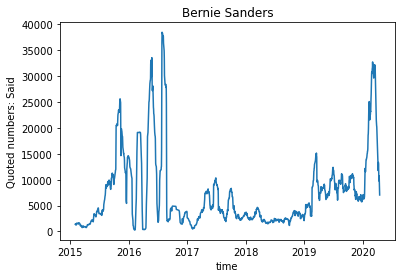

In [24]:
# For example, we can visualize the quotation changes of Bernie Sanders
candidate_quotes_byday['BERNIE SANDERS'].rolling(window=30).sum().plot() # one months average
plt.xlabel('time')
plt.ylabel('Quoted numbers: Said')
plt.title('Bernie Sanders')

**1.3** We compute the total number of quotations until their election. The election dataset only contains the year of election. However, since the U.S. Senate elections always take place in the first week of November, we just compute the total number of quotations until November.1st of the election year.

In [25]:
# Add the election day corresponding to each candidate speaker
candidate_info_byname = candidate_info.set_index(['candidate']) # Allow access info by name as index
candidate_quotes['election_day'] = candidate_quotes['speaker'].map(candidate_info_byname['year']).astype(str)+ '-11-01'
candidate_quotes['election_day'] = pd.to_datetime(candidate_quotes['election_day'])

In [26]:
# Add election result (i.e. vote rate) for each candidate speaker
candidate_info_byname['vote_rate'] = candidate_info_byname['candidatevotes']/candidate_info_byname['totalvotes']

In [27]:
# We group the number of quotations by election day
quotes_byelection = candidate_quotes[candidate_quotes['date_only'] < candidate_quotes['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['speaker'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)

Pearson coefficient: 0.6486209170091914, p value: 7.222286382241744e-23


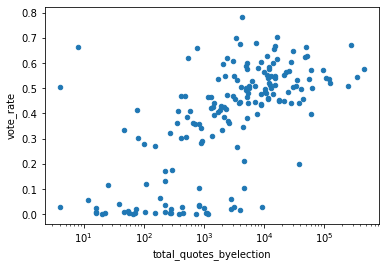

In [28]:
# We add the vote rate and plot the scatter plot of vote rate against total quotes by election
from scipy.stats import pearsonr
tot_quotes_byelection['vote_rate'] = tot_quotes_byelection.index.map(candidate_info_byname['vote_rate'])
quotes_vote = tot_quotes_byelection.plot.scatter(x = 'total_quotes_byelection', y = 'vote_rate', logx=True)
(corr1, pvalue) = pearsonr(np.log(tot_quotes_byelection['total_quotes_byelection']), tot_quotes_byelection['vote_rate'])
print(f'Pearson coefficient: {corr1}, p value: {pvalue}')

**Observation**: Based on the plot above, we can see that there is a positive correlation between quotations and vote_rate with p value < 0.05. The more a candidate was quoted before the election, the higher the voting rate he or she got.

1.4 We can also apply the analysis on quotations that mention senates.

In [9]:
# Load the stored quotations said by senate candidates since 2015 (by year)
senate_quote_20_mention = pd.read_json('SenateData/quotes-2020-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_19_mention = pd.read_json('SenateData/quotes-2019-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_18_mention = pd.read_json('SenateData/quotes-2018-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_17_mention = pd.read_json('SenateData/quotes-2017-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_16_mention = pd.read_json('SenateData/quotes-2016-senates-mention.json.bz2', lines=True, compression='bz2')
senate_quote_15_mention = pd.read_json('SenateData/quotes-2015-senates-mention.json.bz2', lines=True, compression='bz2')

In [12]:
# Concatenate data across all years and display the format of quotation data
annual_frames_mention = [senate_quote_15_mention, senate_quote_16_mention, senate_quote_17_mention, senate_quote_18_mention, senate_quote_19_mention, senate_quote_20_mention]
candidate_quotes_mention = pd.concat(annual_frames_mention)
candidate_quotes_mention.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
16022,2018-08-23-076379,Other than when he was asked by a news outlet ...,Sarah Huckabee Sanders,[Q27986907],2018-08-23 20:02:55,1,"[[Sarah Huckabee Sanders, 0.8962], [None, 0.08...",[http://thehill.com/homenews/administration/40...,E
25574,2017-04-19-136105,They're attempting to show that there's unity ...,None,[],2017-04-19 05:10:00,4,"[[None, 0.7413], [Bernie Sanders, 0.1668], [To...",[http://orlandosentinel.com/news/politics/fl-r...,E
47065,2018-08-11-032839,"Other Calls to Action,",None,[],2018-08-11 02:00:49,1,"[[None, 0.7058], [Ralph Northam, 0.1803], [Geo...",[http://www.neonnettle.com/sphere/584-antifa-p...,E
3758,2018-02-16-118945,The Russian groups indicted by Mueller used so...,None,[],2018-02-16 21:42:54,2,"[[None, 0.9118], [Robert Mueller, 0.0882]]",[https://www.eastbaytimes.com/2018/02/16/calif...,E
19139,2017-04-20-014599,Bernie Sanders isn't helping -- he's hurting. ...,None,[],2017-04-20 18:33:31,2,"[[None, 0.589], [Bernie Sanders, 0.3014], [Kei...",[http://www.theatlantic.com/politics/archive/2...,E
9273,2020-02-26-008214,"Bernie Sanders, this is the first time he's re...",James Carville,[Q1281204],2020-02-26 04:45:04,1,"[[James Carville, 0.8868], [None, 0.0999], [Be...",[http://www.breitbart.com/clips/2020/02/25/jam...,E
7669,2019-02-08-071042,"Other than Summer, we have a really young team,",Ryan Quigley,"[Q25991424, Q7384452]",2019-02-08 23:40:00,1,"[[Ryan Quigley, 0.8489], [None, 0.1511]]",[http://tampabay.com/sports/high-schools/2019/...,E
9247,2018-03-20-092038,Other drivers have told us that EpicVue makes ...,Nick Williams,"[Q14918354, Q16233661, Q30031438, Q3339811]",2018-03-20 23:55:15,1,"[[Nick Williams, 0.8827], [None, 0.1173]]",[https://www.ccjdigital.com/paul-transportatio...,E
22876,2019-01-04-065927,Thank God he's not Marco Rubio!,None,[],2019-01-04 10:17:37,1,"[[None, 0.4391], [Paul Ryan, 0.2786], [Mitt Ro...",[http://www.vdare.com/articles/the-fulford-fil...,E
37481,2017-08-28-072343,Others have deployed to combat zones in Iraq a...,None,[],2017-08-28 09:45:00,32,"[[None, 0.8986], [President Donald Trump, 0.05...",[http://www.chicagotribune.com/news/nationworl...,E


In [13]:
# find the mentioned senator
senate_candidates = list(map(lambda x:x.title(), senate_candidates))
candidate_quotes_mention['mention']=candidate_quotes_mention['quotation'].map(lambda x:np.array(senate_candidates)[np.array(list(k in x for k in senate_candidates))][0])
candidate_quotes_mention.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,mention
0,2015-05-17-016225,I really like Bernie Sanders and his policies ...,None,[],2015-05-17 07:09:22,1,"[[None, 0.81], [Bernie Sanders, 0.19]]",[http://dailykos.com/story/2015/05/15/1384917/...,E,Bernie Sanders
1,2015-03-13-010997,Clearly Europe has a competitive edge in renew...,Anders Jansson,"[Q18199405, Q4753826, Q5828548]",2015-03-13 22:00:36,1,"[[Anders Jansson, 0.8602], [None, 0.1398]]",[http://www.hellenicshippingnews.com/nordic-ma...,E,Other
2,2015-08-25-018582,Elizabeth Warren does have a thumb on the puls...,Bakari Sellers,[Q4849014],2015-08-25 10:02:35,4,"[[Bakari Sellers, 0.8813], [None, 0.1075], [El...",[http://www.kspr.com/news/politics/does-elizab...,E,Bernie Sanders
3,2015-05-12-011764,"For media workers, our stand is very clear. We...",None,[],2015-05-12 16:00:00,1,"[[None, 0.9821], [Yazid Sufaat, 0.0179]]",[http://www.thestar.com.my/News/Nation/2015/05...,E,Other
4,2015-09-30-031494,"How McConnell outfoxed Ted Cruz,",Mitch McConnell,[Q355522],2015-09-30 07:57:00,2,"[[Mitch McConnell, 0.7734], [None, 0.202], [Pr...",[http://feeds.washingtonpost.com/c/34656/f/636...,E,Ted Cruz
5,2015-12-28-022873,"I met Tom Jones,",Emre Turkmen,[Q20090653],2015-12-28 12:20:40,1,"[[Emre Turkmen, 0.8153], [None, 0.1433], [Katy...",[http://www.bbc.co.uk/newsbeat/articles/35101319],E,Tom Jones
6,2015-10-28-077973,"Mark Zuckerberg's personal Senator, Sen. Marco...",Donald Trump,"[Q22686, Q27947481]",2015-10-28 21:01:48,1,"[[Donald Trump, 0.3948], [None, 0.3058], [Jeff...",[http://breitbart.com/immigration/2015/10/28/t...,E,Marco Rubio
7,2015-10-23-076901,Other holidays are for families; Halloween is ...,Jim Fielding,[Q16201553],2015-10-23 04:22:38,1,"[[Jim Fielding, 0.7661], [None, 0.2339]]",[http://www.reviewjournal.com/life/home-and-ga...,E,Other
8,2015-07-16-079718,"Other teams improve, we need to improve and ge...",None,[],2015-07-16 09:30:00,8,"[[None, 0.4601], [Vincent Kompany, 0.3357], [R...",[http://www.mcfc.co.uk/News/Tour-2015/2015/Cit...,E,Other
9,2015-06-14-032844,"Otherwise, from what I've seen, trees are bein...",Kenny Clark,"[Q3393375, Q6391006]",2015-06-14 05:00:00,1,"[[Kenny Clark, 0.4428], [None, 0.4277], [Bill ...",[http://www.arkansasonline.com/news/2015/jun/1...,E,Other


In [15]:
candidate_quotes_mention['date_only'] = candidate_quotes_mention['date'].dt.date

# filt out Other and Others
candidate_quotes_mention = candidate_quotes_mention[candidate_quotes_mention.mention!='Other']
candidate_quotes_mention = candidate_quotes_mention[candidate_quotes_mention.mention!='Others']
candidate_quotes_mention_byday = candidate_quotes_mention.groupby(['mention', 'date_only'])['numOccurrences'].sum()
candidate_quotes_mention_byday

mention           date_only 
A. Wayne Johnson  2017-06-22    1
                  2019-10-24    1
Aaron Day         2017-07-20    1
Aaron James       2015-10-10    1
                  2016-09-11    3
                               ..
Wendy Long        2017-05-09    4
                  2018-03-27    1
                  2018-05-31    2
                  2018-06-01    1
Zak Ringelstein   2018-06-22    1
Name: numOccurrences, Length: 26228, dtype: int64

Text(0.5, 1.0, 'Bernie Sanders')

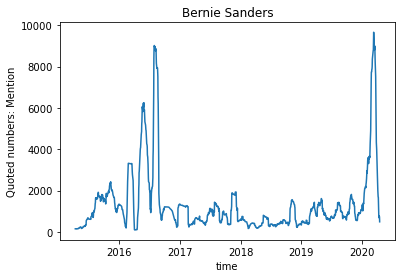

In [16]:
# For example, we can visualize the quotation changes of Bernie Sanders
candidate_quotes_mention_byday['Bernie Sanders'].rolling(window=30).sum().plot() # one months average
plt.xlabel('time')
plt.ylabel('Quoted numbers: Mention')
plt.title('Bernie Sanders')

In [17]:
# Add the election day corresponding to each candidate speaker
candidate_info_byname = candidate_info.set_index(['candidate']) # Allow access info by name as index
candidate_quotes_mention['mention']=candidate_quotes_mention.mention.map(lambda x:x.upper())
candidate_quotes_mention['election_day'] = candidate_quotes_mention['mention'].map(candidate_info_byname['year']).astype(str)+ '-11-01'
candidate_quotes_mention['election_day'] = pd.to_datetime(candidate_quotes_mention['election_day'])
candidate_quotes_mention

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,mention,date_only,election_day
0,2015-05-17-016225,I really like Bernie Sanders and his policies ...,None,[],2015-05-17 07:09:22,1,"[[None, 0.81], [Bernie Sanders, 0.19]]",[http://dailykos.com/story/2015/05/15/1384917/...,E,BERNIE SANDERS,2015-05-17,2018-11-01
2,2015-08-25-018582,Elizabeth Warren does have a thumb on the puls...,Bakari Sellers,[Q4849014],2015-08-25 10:02:35,4,"[[Bakari Sellers, 0.8813], [None, 0.1075], [El...",[http://www.kspr.com/news/politics/does-elizab...,E,BERNIE SANDERS,2015-08-25,2018-11-01
4,2015-09-30-031494,"How McConnell outfoxed Ted Cruz,",Mitch McConnell,[Q355522],2015-09-30 07:57:00,2,"[[Mitch McConnell, 0.7734], [None, 0.202], [Pr...",[http://feeds.washingtonpost.com/c/34656/f/636...,E,TED CRUZ,2015-09-30,2018-11-01
5,2015-12-28-022873,"I met Tom Jones,",Emre Turkmen,[Q20090653],2015-12-28 12:20:40,1,"[[Emre Turkmen, 0.8153], [None, 0.1433], [Katy...",[http://www.bbc.co.uk/newsbeat/articles/35101319],E,TOM JONES,2015-12-28,2016-11-01
6,2015-10-28-077973,"Mark Zuckerberg's personal Senator, Sen. Marco...",Donald Trump,"[Q22686, Q27947481]",2015-10-28 21:01:48,1,"[[Donald Trump, 0.3948], [None, 0.3058], [Jeff...",[http://breitbart.com/immigration/2015/10/28/t...,E,MARCO RUBIO,2015-10-28,2016-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
12426,2020-02-04-115095,Will he have as much money as Bernie Sanders? ...,John Morgan,"[Q11979020, Q139214, Q16563478, Q18385418, Q24...",2020-02-04 00:00:00,12,"[[John Morgan, 0.7601], [None, 0.2232], [Joe B...",[http://wnyt.com/politics/bidens-poor-showing-...,E,BERNIE SANDERS,2020-02-04,2018-11-01
12427,2020-04-01-014369,Flavor don't know the difference between Berni...,Chuck D,[Q733373],2020-04-01 03:25:11,1,"[[Chuck D, 0.7015], [None, 0.1735], [Flavor Fl...",[http://www.billboard.com/articles/columns/hip...,E,BERNIE SANDERS,2020-04-01,2018-11-01
12428,2020-01-21-022794,He was sitting next to Cory Booker on the plan...,None,[],2020-01-21 11:00:00,2,"[[None, 0.742], [American historian, 0.258]]",[http://newyorker.com/culture/culture-desk/the...,E,CORY BOOKER,2020-01-21,2020-11-01
12430,2020-04-03-037736,Kelly Loeffler can't buy her way out of this. ...,Doug Collins,"[Q18352424, Q3162841, Q5300375, Q919954]",2020-04-03 12:30:13,1,"[[Doug Collins, 0.8913], [None, 0.1087]]",[http://www.myajc.com/blog/politics/the-jolt-t...,E,KELLY LOEFFLER,2020-04-03,2020-11-01


Pearson coefficient: 0.499469518483117, p value: 1.845705601612881e-14


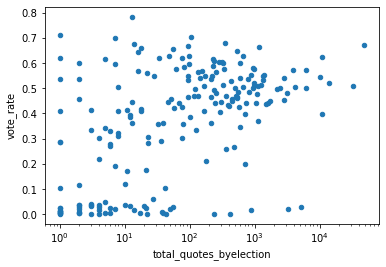

In [19]:
from scipy.stats import pearsonr
# Add election result (i.e. vote rate) for each candidate speaker
candidate_info_byname['vote_rate'] = candidate_info_byname['candidatevotes']/candidate_info_byname['totalvotes']
# We group the number of quotations by election day
quotes_byelection = candidate_quotes_mention[candidate_quotes_mention['date_only'] < candidate_quotes_mention['election_day']]
tot_quotes_byelection = pd.DataFrame(quotes_byelection.groupby(['mention'])['numOccurrences'].sum())
tot_quotes_byelection.rename(columns = {'numOccurrences': 'total_quotes_byelection'}, inplace=True)
# We add the vote rate and plot the scatter plot of vote rate against total quotes by election
tot_quotes_byelection['vote_rate'] = tot_quotes_byelection.index.map(candidate_info_byname['vote_rate'])
quotes_vote = tot_quotes_byelection.plot.scatter(x = 'total_quotes_byelection', y = 'vote_rate', logx=True)
(corr1, pvalue) = pearsonr(np.log(tot_quotes_byelection['total_quotes_byelection']), tot_quotes_byelection['vote_rate'])
print(f'Pearson coefficient: {corr1}, p value: {pvalue}')

## 2. Weigh the quotations by reading statistics
We are aware of the different reading statistics of different publishers or news agencies. We try to weigh the quotations by popularities of the publishers.

**A problem of QuoteBank noticed when parsing url**: some urls are list of list of urls, like: [['url_a', 'url_b'], 'url_c', 'url_d']

**2.1** First, we sample 20k quotes and look at the source media of those quotations. This would give us a feel of how much media is covered by QuoteBank and which media appear most often.

In [26]:
# Sample 20k quotes and see where published
sample = candidate_quotes.sample(20000)
total_domains = []
for i in sample.index:
    urls = sample.at[i,'urls']
    for url in urls: # Some URL here is actually a list (there are lists in list), not sure why it happens
        if isinstance(url, list):
            for url_ in url:
                total_domains.append(get_tld(url_, as_object=True).domain) # when it is a list, the multiply urls point to the same website
        else:
            total_domains.append(get_tld(url, as_object=True).domain)

In [27]:
# Count the frequency of media occurences in quotation dataset
from collections import Counter
domain_count = Counter(total_domains).most_common()
print("----top 30 news agency/publisher:\n ", domain_count[0:30])
print('----number of news agency covered:', len(domain_count))


----top 30 news agency/publisher:
  [('msn', 3454), ('ordinary-gentlemen', 1640), ('yahoo', 974), ('wikia', 838), ('foxnews', 736), ('businessinsider', 707), ('breitbart', 701), ('einnews', 676), ('politico', 666), ('washingtonexaminer', 645), ('krmg', 640), ('washingtontimes', 588), ('cnn', 516), ('washingtonpost', 497), ('huffingtonpost', 481), ('newsok', 443), ('indiatimes', 415), ('thehill', 406), ('cbsnews', 398), ('sfgate', 393), ('nytimes', 387), ('msnbc', 373), ('reuters', 364), ('nbcnews', 324), ('seattletimes', 287), ('stuff', 276), ('startribune', 265), ('go', 265), ('newsmax', 264), ('latimes', 240)]
----number of news agency covered: 5068


Among 20k samples, there are over 4000 different website domains, indicating a sufficiently wide coverage of media. So the quotations can be an indicator of public exposure. Besides, we observe an exponential decrease of counts in the database.

Text(0.5, 0, 'occurences in sampled quote data')

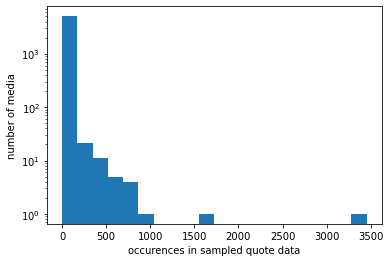

In [28]:
# Plot the histogram characterizing the frequency of each media appearing
_, y_counts = zip(*domain_count)
plt.hist(y_counts, bins=20)
plt.yscale('log')
plt.ylabel('number of media')
plt.xlabel('occurences in sampled quote data')

The distribution is heavy-tailed, with only a few big media like CNN and Fox News occurring frequently. Most media occurs no more than 1.5% among all quotations. So, we think it is sufficient to just weigh the quotations extracted from those frequently occurring media. Moreover, it is very difficult to automatically find media's reading statistics (or other indicators of popularity) just based on the url major domain name. We could not think of a way to do so. Neither could we find an open dataset helping us. Therefore, we decide to manually look up the reading statistics of those top 30 new agencies. For the rest media, we will sample 10 media from them and manually look up the reading statistics. We will take the average reading statistics of those 10 media to represent the reading statistics of the rest media. This will take up some time, so we plan to finish those manual work in the following weeks (see proposed timeline). As a result, we do not include any exposure level (quotation weighted by media reading statistics) in Milestone 2. Instead, we just use the number of quotations (assuming all media offer the same public exposure).

## 4. Features for Prediction Model
In the proposal, we decide to build a model predicting election results based on quotation data. Here, we preprocess the quote data and candidate data to generate the features for training our model.

The first feature is the change of quotation number over time.

In [119]:
date_start=pd.to_datetime('2015-01-01', format='%Y-%m-%d')
all_date = (pd.to_datetime('2020-12-31', format='%Y-%m-%d') - date_start).days
candidate_quotes_name = candidate_quotes_byday.index.map(lambda x:x[0]).drop_duplicates()
candidate_quotes_feature = pd.DataFrame(np.zeros([all_date,len(candidate_quotes_name)]), columns=candidate_quotes_name)

for candidate in candidate_quotes_name:
    candidate_mention = candidate_quotes_byday[candidate]
    for date in candidate_mention.index:
        date2days = (pd.to_datetime(date, format='%Y-%m-%d') - date_start).days
        candidate_quotes_feature[candidate].iloc[date2days] = candidate_mention.loc[date]

We also include the party affiliation of each candidate. Moreover, we also consider the affiliated party's vote rate in the most recent presidential election. Since we are looking at the election from 2016 to 2021, we will use the 2016 presidential election data for the senate election from 2016 to 2019, and use the 2020 presidential election data for the senate election from 2020 to 2021.

The presidential election data also comes from the MIT Election Data and Science Lab[2]. It contains the presidential election voting result by each state.

[2]MIT Election Data and Science Lab, 2017, "U.S. President 1976–2020", https://doi.org/10.7910/DVN/42MVDX, Harvard Dataverse, V6, UNF:6:4KoNz9KgTkXy0ZBxJ9ZkOw== [fileUNF]

In [29]:
# We load 2016 and 2020 result separately
president = pd.read_csv('SenateData/1976-2020-president.csv')
president16 = president[president['year'] == 2016].copy()
president20 = president[president['year'] == 2020].copy()
president16.sample(10) #display format of president election data

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3581,2016,MONTANA,MT,30,81,64,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,279240,494526,20210113,NaN,REPUBLICAN
3517,2016,KENTUCKY,KY,21,61,51,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1202971,1924149,20210113,NaN,REPUBLICAN
3680,2016,TENNESSEE,TN,47,62,54,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1522925,2508027,20210113,NaN,REPUBLICAN
3603,2016,NEW HAMPSHIRE,NH,33,12,4,US PRESIDENT,"DE LA FUENTE, ROQUE """"ROCKY""""",AMERICAN DELTA PARTY,False,678,744296,20210113,NaN,OTHER
3735,2016,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,6904,258788,20210113,NaN,OTHER
3617,2016,NEW MEXICO,NM,35,85,66,US PRESIDENT,"MCMULLIN, EVAN",BETTER FOR AMERICA,False,5825,798319,20210113,NaN,OTHER
3708,2016,VIRGINIA,VA,51,54,40,US PRESIDENT,NaN,NaN,True,31870,3982752,20210113,NaN,OTHER
3539,2016,MARYLAND,MD,24,52,52,US PRESIDENT,NaN,NaN,True,33263,2781446,20210113,NaN,OTHER
3548,2016,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,OTHER,NaN,False,50488,3378821,20210113,NaN,OTHER
3435,2016,COLORADO,CO,8,84,62,US PRESIDENT,SCATTERING,UNAFFILIATED,False,31485,2780220,20210113,NaN,OTHER


In [30]:
# We add vote rate to each candidate in each state
president16['vote_rate'] = president16['candidatevotes']/president16['totalvotes']
president20['vote_rate'] = president20['candidatevotes']/president20['totalvotes']

In [31]:
# We group the data by states and party_simplified (represent small parties, independent, NaN all by 'Others'). 
# We take sum of vote rates of cadidates from the same party_simplified
vote_byparty16 = president16.groupby(['state', 'party_simplified'])['vote_rate'].sum()
vote_byparty20 = president20.groupby(['state', 'party_simplified'])['vote_rate'].sum()
vote_byparty16

state      party_simplified
ALABAMA    DEMOCRAT            0.343579
           LIBERTARIAN         0.020942
           OTHER               0.014648
           REPUBLICAN          0.620831
ALASKA     DEMOCRAT            0.365509
                                 ...   
WISCONSIN  REPUBLICAN          0.472182
WYOMING    DEMOCRAT            0.216289
           LIBERTARIAN         0.051343
           OTHER               0.058384
           REPUBLICAN          0.673984
Name: vote_rate, Length: 201, dtype: float64

In [32]:
# We create feature dataframe and add in party_simplified, party vote rate in most recent presidential election, and final vote rate
# If the senate candidate's affiliated party does not show up in the most recent president election, party_vote_rate is 0
features = candidate_info_byname[['party_simplified', 'vote_rate']].copy()
for name in features.index:
    state_ = candidate_info_byname.loc[name, 'state']
    party_ = candidate_info_byname.loc[name, 'party_simplified']
    if candidate_info_byname.loc[name, 'year'] < 2020: #for candidate before 2020
        if party_ in vote_byparty16[state_].index:  #check whether the affiliated party in recent president election
            features.loc[name, 'party_vote_rate'] = vote_byparty16[state_][party_]
        else: 
            features.loc[name, 'party_vote_rate'] = 0
    else:
        if party_ in vote_byparty20[state_].index: 
            features.loc[name, 'party_vote_rate'] = vote_byparty20[state_][party_]
        else: 
            features.loc[name, 'party_vote_rate'] = 0

In [33]:
features.sample(10)

,party_simplified,vote_rate,party_vote_rate
candidate,,,
BERYL BILLIOT,OTHER,0.009689,0.015900
JERRY TROOIEN,OTHER,0.009401,0.047934
JERRY MORAN,REPUBLICAN,0.621753,0.566546
PAULA M OVERBY,OTHER,0.008896,0.047934
TAMMY DUCKWORTH,DEMOCRAT,0.548617,0.558254
JOHN HOWARD WILHELM,OTHER,0.003894,0.016412
KRIS L. TODD,OTHER,0.002266,0.045616
SUZANNE HERZOG,OTHER,0.008117,0.013975
PATRICK MURPHY,DEMOCRAT,0.443149,0.478233


# 5. statistics of sentence complexity

In [54]:
# calculate average sentence length (by word number)
import re
candidate_quotes['split_quotation']=candidate_quotes.quotation.map(lambda x:re.split(r'\.|!|\?',x))
candidate_quotes['split_quotation']=candidate_quotes.split_quotation.map(lambda x:list(filter(None, x))) # remove empty string
candidate_quotes['avg_sentence_length'] = candidate_quotes.split_quotation.map(lambda x:np.mean(list(map(lambda s:len(s.split()), x))))
candidate_quotes.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains,date_only,election_day,split_quotation,sentence_length,avg_word_length
0,2015-08-31-000271,... a great day for veterans here in Littleton...,JEANNE SHAHEEN,[Q270316],2015-08-31 02:10:00,2,"[[Jeanne Shaheen, 0.742], [None, 0.2359], [Kel...",[http://www.unionleader.com/article/20150831/N...,E,"[com, com]",2015-08-31,2020-11-01,[ a great day for veterans here in Littleton a...,44,4.318182
1,2015-10-25-000242,"' It is not now, nor has it ever been, the gol...",BERNIE SANDERS,[Q359442],2015-10-25 14:12:35,1,"[[Bernie Sanders, 0.5395], [None, 0.3128], [Hi...",[http://examiner.com/article/bernie-sanders-sl...,E,[com],2015-10-25,2018-11-01,"[' It is not now, nor has it ever been, the go...",73,3.931507
2,2015-11-13-000427,"[ My dad ] saw what a great opportunity it was,",PAUL STANTON,"[Q255668, Q27842994]",2015-11-13 08:45:01,1,"[[Paul Stanton, 0.6521], [None, 0.3479]]",[http://thecrimson.com/article/2015/11/13/paul...,E,[com],2015-11-13,2016-11-01,"[[ My dad ] saw what a great opportunity it was,]",11,3.363636
3,2015-06-26-015863,hurt Michigan workers and cost thousands of Am...,GARY PETERS,"[Q1230954, Q1494930, Q5525742, Q56560036]",2015-06-26 22:31:05,1,"[[Gary Peters, 0.7907], [None, 0.2093]]",[http://detroitnews.com/story/news/politics/20...,E,[com],2015-06-26,2020-11-01,[hurt Michigan workers and cost thousands of A...,10,6.300000
4,2015-12-09-000882,"21st Century Workers Tax Cut Act,",PATTY MURRAY,[Q258825],2015-12-09 00:00:00,1,"[[Patty Murray, 0.946], [None, 0.0488], [Richa...",[http://www.brookings.edu/research/papers/2015...,E,[edu],2015-12-09,2016-11-01,"[21st Century Workers Tax Cut Act,]",6,4.666667
5,2015-12-29-000719,91 percent of suspected terrorists who attempt...,PATRICK MURPHY,"[Q17418821, Q21170773, Q2224935, Q23418906, Q3...",2015-12-29 15:42:57,4,"[[Patrick Murphy, 0.8398], [None, 0.1579], [Je...",[http://politifact.com/florida/statements/2015...,E,"[com, com, com]",2015-12-29,2016-11-01,[91 percent of suspected terrorists who attemp...,19,4.947368
6,2015-08-04-030016,I believe there is a reasonable way to address...,MARCO RUBIO,[Q324546],2015-08-04 13:19:27,1,"[[Marco Rubio, 0.8876], [None, 0.0669], [Jeff ...",[http://breitbart.com/big-government/2015/08/0...,E,[com],2015-08-04,2016-11-01,[I believe there is a reasonable way to addres...,112,4.169643
7,2015-03-20-025844,I congratulated the president on winning and c...,MITT ROMNEY,[Q4496],2015-03-20 23:24:32,1,"[[Mitt Romney, 0.8535], [None, 0.0972], [Katie...",[http://www.ijreview.com/2015/03/276054-mitt-r...,E,[com],2015-03-20,2018-11-01,[I congratulated the president on winning and ...,84,4.714286
8,2015-01-27-025032,I do believe that it's important that Prime Mi...,JOHN MCCAIN,[Q10390],2015-01-27 19:43:39,2,"[[John McCain, 0.6399], [None, 0.3338], [Benja...",[http://www.algemeiner.com/2015/01/27/boehner-...,E,"[com, com]",2015-01-27,2016-11-01,[I do believe that it's important that Prime M...,15,5.200000
9,2015-03-04-028862,I gave the prime minister 50 standing ovations...,RAND PAUL,[Q463557],2015-03-04 15:33:52,5,"[[Rand Paul, 0.6452], [None, 0.1714], [Bob Cor...",[http://businessinsider.com/rand-paul-bashes-g...,E,"[com, com, com, com, com]",2015-03-04,2016-11-01,[I gave the prime minister 50 standing ovation...,13,5.307692


In [58]:
# calculate average word lenghth for each quotation
candidate_quotes['split_words'] = candidate_quotes.quotation.map(lambda x:x.split())
candidate_quotes['avg_word_length'] = candidate_quotes.split_words.map(lambda x:np.mean(list(map(lambda w:len(w), x))))
candidate_quotes.head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains,date_only,election_day,split_quotation,sentence_length,avg_word_length,avg_sentence_length,split_words
0,2015-08-31-000271,... a great day for veterans here in Littleton...,JEANNE SHAHEEN,[Q270316],2015-08-31 02:10:00,2,"[[Jeanne Shaheen, 0.742], [None, 0.2359], [Kel...",[http://www.unionleader.com/article/20150831/N...,E,"[com, com]",2015-08-31,2020-11-01,[ a great day for veterans here in Littleton a...,44,4.318182,21.500000,"[..., a, great, day, for, veterans, here, in, ..."
1,2015-10-25-000242,"' It is not now, nor has it ever been, the gol...",BERNIE SANDERS,[Q359442],2015-10-25 14:12:35,1,"[[Bernie Sanders, 0.5395], [None, 0.3128], [Hi...",[http://examiner.com/article/bernie-sanders-sl...,E,[com],2015-10-25,2018-11-01,"[' It is not now, nor has it ever been, the go...",73,3.931507,24.333333,"[', It, is, not, now,, nor, has, it, ever, bee..."
2,2015-11-13-000427,"[ My dad ] saw what a great opportunity it was,",PAUL STANTON,"[Q255668, Q27842994]",2015-11-13 08:45:01,1,"[[Paul Stanton, 0.6521], [None, 0.3479]]",[http://thecrimson.com/article/2015/11/13/paul...,E,[com],2015-11-13,2016-11-01,"[[ My dad ] saw what a great opportunity it was,]",11,3.363636,11.000000,"[[, My, dad, ], saw, what, a, great, opportuni..."
3,2015-06-26-015863,hurt Michigan workers and cost thousands of Am...,GARY PETERS,"[Q1230954, Q1494930, Q5525742, Q56560036]",2015-06-26 22:31:05,1,"[[Gary Peters, 0.7907], [None, 0.2093]]",[http://detroitnews.com/story/news/politics/20...,E,[com],2015-06-26,2020-11-01,[hurt Michigan workers and cost thousands of A...,10,6.300000,10.000000,"[hurt, Michigan, workers, and, cost, thousands..."
4,2015-12-09-000882,"21st Century Workers Tax Cut Act,",PATTY MURRAY,[Q258825],2015-12-09 00:00:00,1,"[[Patty Murray, 0.946], [None, 0.0488], [Richa...",[http://www.brookings.edu/research/papers/2015...,E,[edu],2015-12-09,2016-11-01,"[21st Century Workers Tax Cut Act,]",6,4.666667,6.000000,"[21st, Century, Workers, Tax, Cut, Act,]"
5,2015-12-29-000719,91 percent of suspected terrorists who attempt...,PATRICK MURPHY,"[Q17418821, Q21170773, Q2224935, Q23418906, Q3...",2015-12-29 15:42:57,4,"[[Patrick Murphy, 0.8398], [None, 0.1579], [Je...",[http://politifact.com/florida/statements/2015...,E,"[com, com, com]",2015-12-29,2016-11-01,[91 percent of suspected terrorists who attemp...,19,4.947368,19.000000,"[91, percent, of, suspected, terrorists, who, ..."
6,2015-08-04-030016,I believe there is a reasonable way to address...,MARCO RUBIO,[Q324546],2015-08-04 13:19:27,1,"[[Marco Rubio, 0.8876], [None, 0.0669], [Jeff ...",[http://breitbart.com/big-government/2015/08/0...,E,[com],2015-08-04,2016-11-01,[I believe there is a reasonable way to addres...,112,4.169643,22.400000,"[I, believe, there, is, a, reasonable, way, to..."
7,2015-03-20-025844,I congratulated the president on winning and c...,MITT ROMNEY,[Q4496],2015-03-20 23:24:32,1,"[[Mitt Romney, 0.8535], [None, 0.0972], [Katie...",[http://www.ijreview.com/2015/03/276054-mitt-r...,E,[com],2015-03-20,2018-11-01,[I congratulated the president on winning and ...,84,4.714286,21.000000,"[I, congratulated, the, president, on, winning..."
8,2015-01-27-025032,I do believe that it's important that Prime Mi...,JOHN MCCAIN,[Q10390],2015-01-27 19:43:39,2,"[[John McCain, 0.6399], [None, 0.3338], [Benja...",[http://www.algemeiner.com/2015/01/27/boehner-...,E,"[com, com]",2015-01-27,2016-11-01,[I do believe that it's important that Prime M...,15,5.200000,15.000000,"[I, do, believe, that, it's, important, that, ..."
9,2015-03-04-028862,I gave the prime minister 50 standing ovations...,RAND PAUL,[Q463557],2015-03-04 15:33:52,5,"[[Rand Paul, 0.6452], [None, 0.1714], [Bob Cor...",[http://businessinsider.com/rand-paul-bashes-g...,E,"[com, com, com, com, com]",2015-03-04,2016-11-01,[I gave the prime minister 50 standing ovation...,13,5.307692,13.000000,"[I, gave, the, prime, minister, 50, standing, ..."
